# Import data

In [75]:
import pandas as pd

In [76]:
data = pd.read_csv("Carseats.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Normality Test

Library scipy menyediakan berbagai macam fungsi statistik yang dapat digunakan layaknya pada R (seperti uji statistik, perhitungan densitas, variabel random ,dsb).
Di luar itu, scipy juga menyediakan banyak fungsi matematis yang sering digunakan, khususnya dalam aljabar linear.

Informasi lebih lanjut dapat dilihat melalui https://docs.scipy.org/doc/scipy/reference/stats.html

In [77]:
from scipy import stats

#### Kolmogorov-Smirnov test

In [78]:
stats.kstest(data["Sales"], 'norm')

KstestResult(statistic=0.9666322582846675, pvalue=0.0, statistic_location=2.52, statistic_sign=-1)

Karena nilai sig. = 0.000 <  0.05 = α. Maka H0 ditolak. Artinya data variabel dependen (Sales) diambil dari populasi yang tidak berdistribusi normal. Jadi asumsi normalitas data dependen untuk melakukan uji regresi linear berganda tidak terpenuhi. Sehingga data variabel dependen tidak dapat digunakan untuk melakukan pengujian lebuh lanjut. namun untuk keperluan lebih lanjut maka kita asumsikan berdistribusi normal.

#### Shapiro-Wilk

In [79]:
stats.shapiro(data['Sales'])

ShapiroResult(statistic=0.9952031970024109, pvalue=0.2541121542453766)

#### Anderson-Darling

In [80]:
stats.anderson(data['Sales'], dist = 'norm')

AndersonResult(statistic=0.6198640020506332, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.496325000000001, scale=2.824115048806837)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

# Linearitas 

#### Dilihat dari korelasi linear

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
mydata =data[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education"]]

<Axes: >

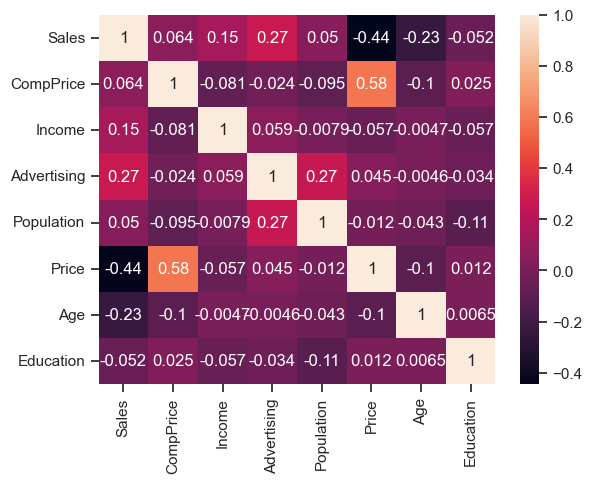

In [83]:
%matplotlib inline
correlation = mydata.corr()
sns.heatmap(correlation,annot=True)

#### Dilihat dari scatterplot

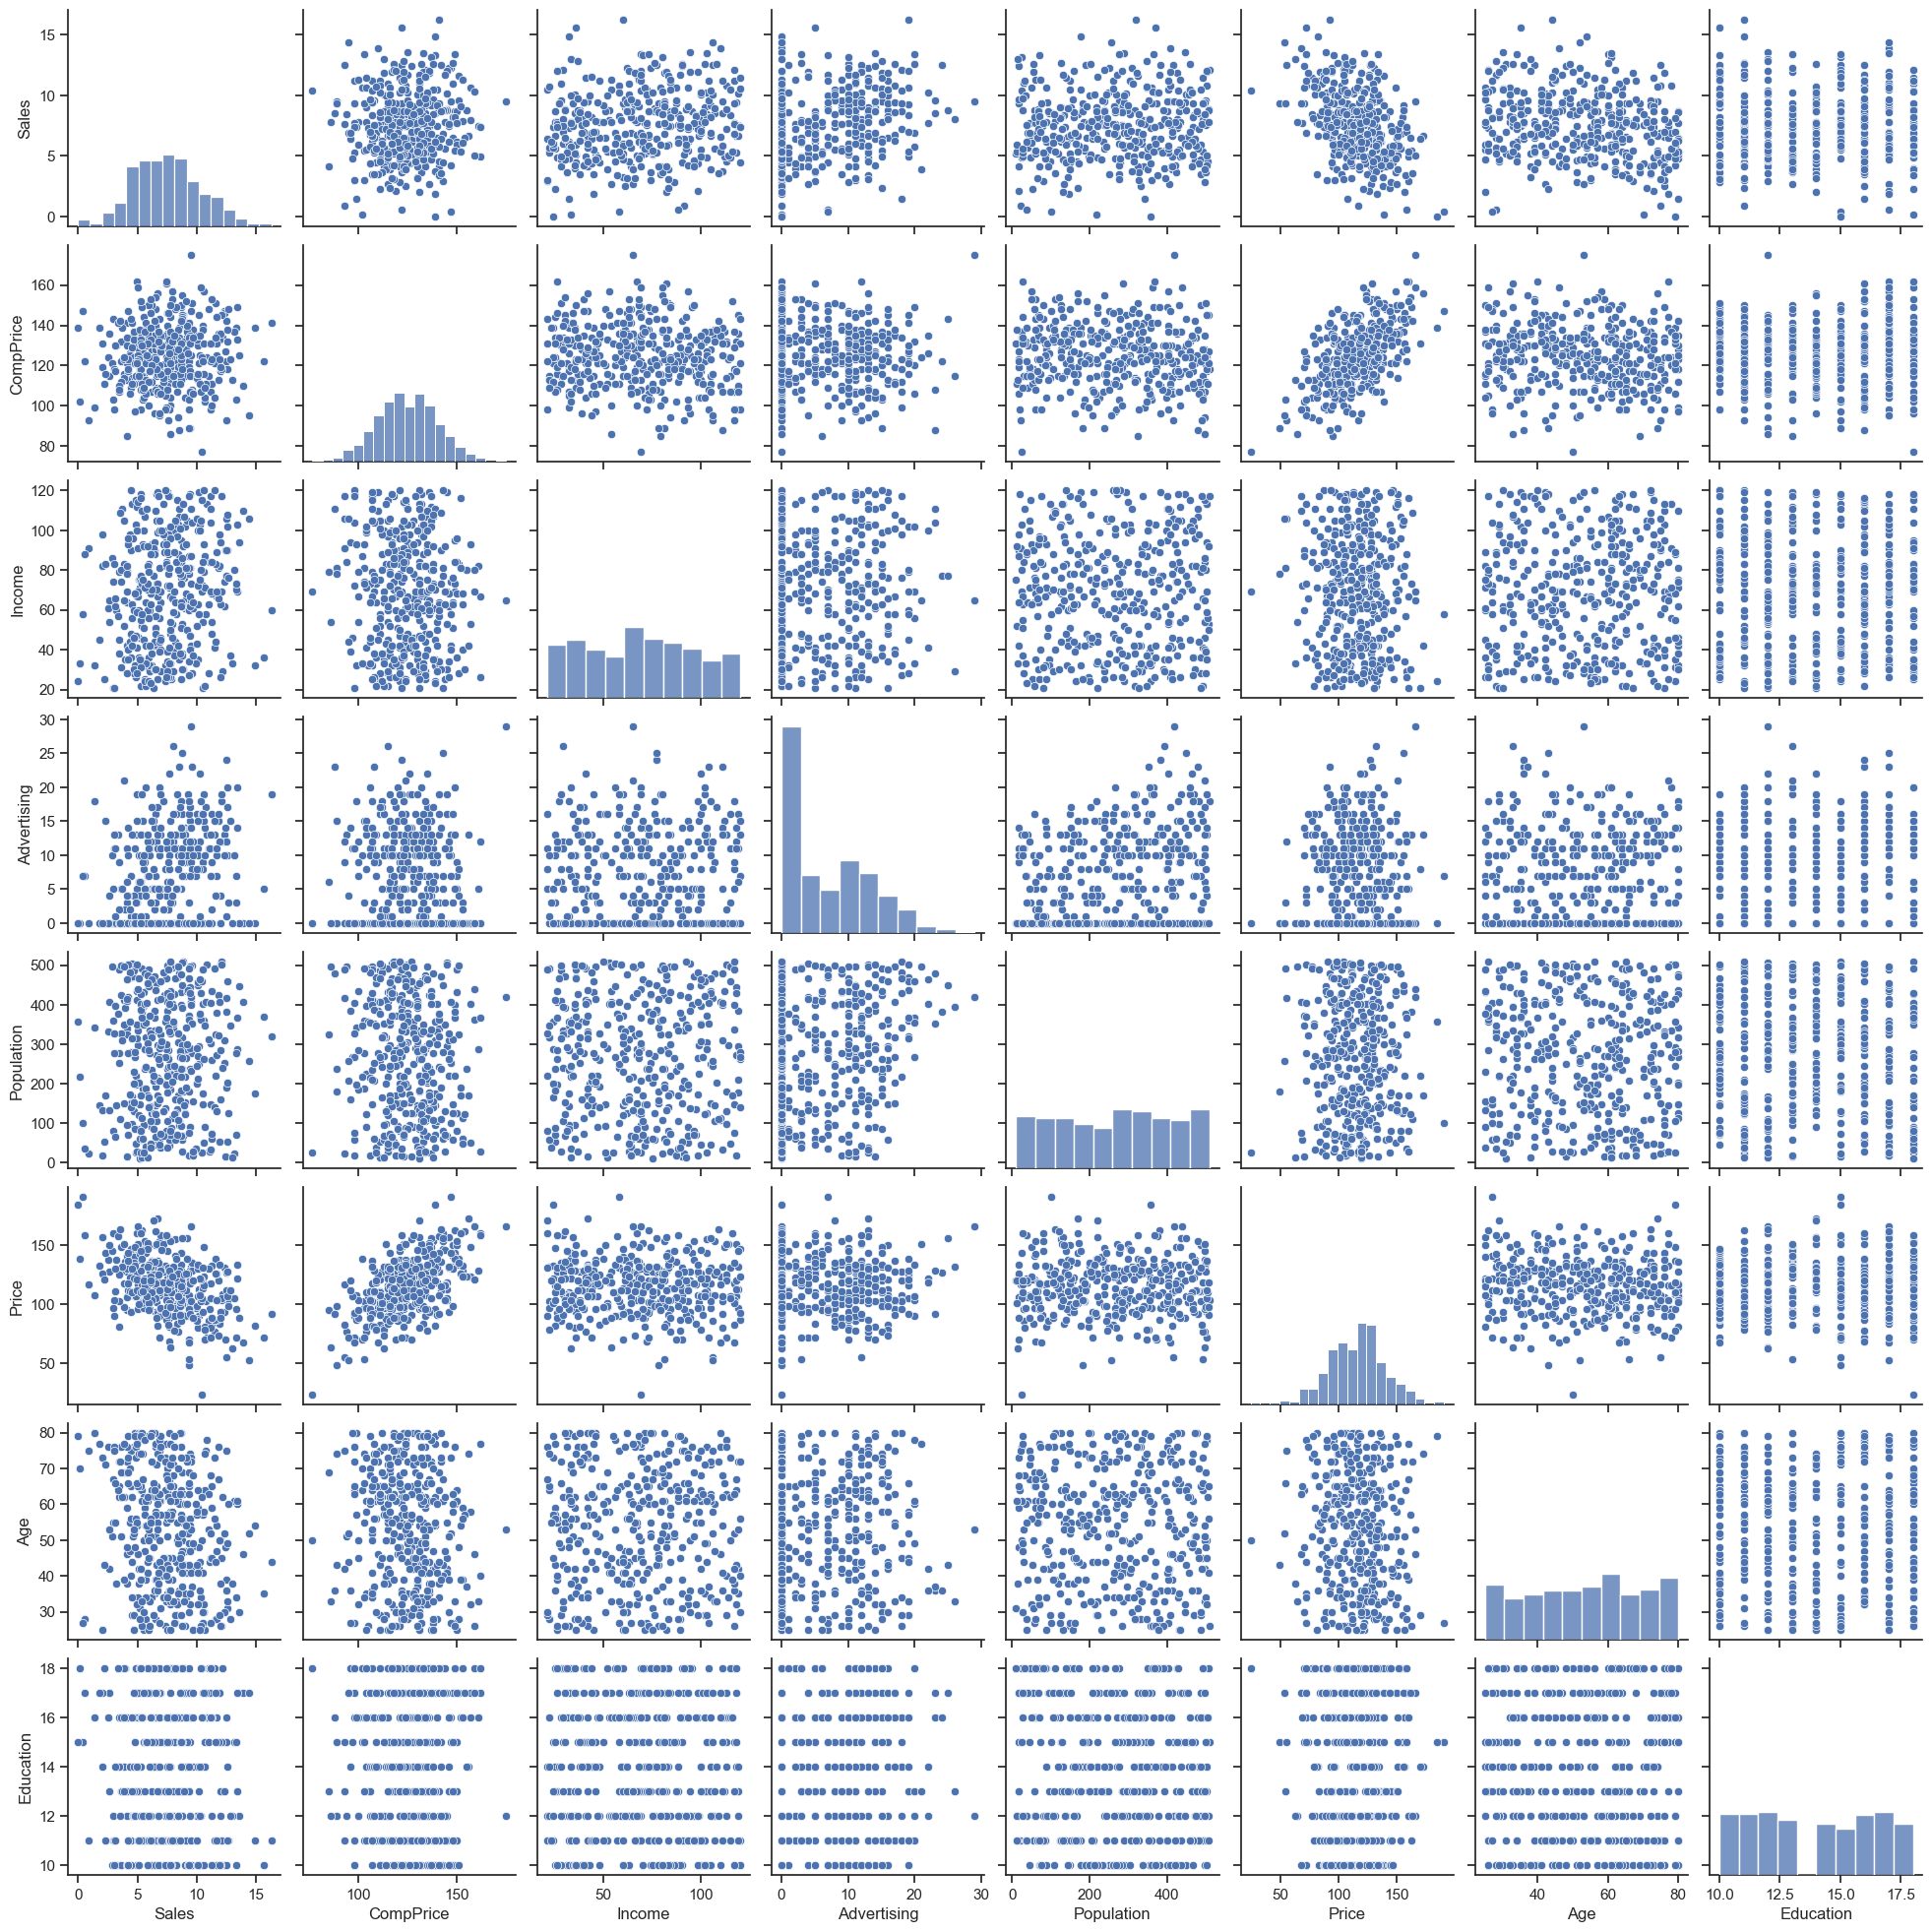

In [84]:
sns.set_theme(style="ticks")
sns.pairplot(mydata)

# Linear Regression

#### Make Dummies Variable

In [85]:
dms = pd.get_dummies(data[['ShelveLoc',"Urban","US"]])
dms.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0


*   pada variable ShelveLoc akan dipilih ShelveLoc_Bad sebagai refference catagory 
*   pada variable Urban akan dipilih Urban_no sebagai refference catagory 
*   pada variable US akan dipilih US_no sebagai refference catagory 






In [86]:
mydata= pd.concat([data,dms], axis=1 )
mydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1,0,0,0,1,0,1


In [87]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   ShelveLoc         400 non-null    object 
 7   Age               400 non-null    int64  
 8   Education         400 non-null    int64  
 9   Urban             400 non-null    object 
 10  US                400 non-null    object 
 11  ShelveLoc_Bad     400 non-null    uint8  
 12  ShelveLoc_Good    400 non-null    uint8  
 13  ShelveLoc_Medium  400 non-null    uint8  
 14  Urban_No          400 non-null    uint8  
 15  Urban_Yes         400 non-null    uint8  
 16  US_No             400 non-null    uint8  
 1

In [88]:
# Converti boolean to int
mydata["ShelveLoc_Bad"] = mydata["ShelveLoc_Bad"].astype(int)
mydata["ShelveLoc_Good"] = mydata["ShelveLoc_Good"].astype(int)
mydata["ShelveLoc_Medium"] = mydata["ShelveLoc_Medium"].astype(int)
mydata["Urban_No"] = mydata["Urban_No"].astype(int)
mydata["Urban_Yes"] = mydata["Urban_Yes"].astype(int)
mydata["US_No"] = mydata["US_No"].astype(int)
mydata["US_Yes"] = mydata["US_Yes"].astype(int)


#### Subsetting data for regression linear (mengambil kolom-kolom yang diperlukan saja)

In [89]:
data_reg=mydata[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]
data_reg

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


#### Begin Multiple Linear Regression

Dalam contoh ini, ditunjukkan regresi linear menggunakan library statsmodel. Library ini cukup mudah untuk digunakan dalam analisis regresi klasik (yang pernah ditemukan dalam kelas teori).

In [90]:
import statsmodels.api as sm

# Model 1 - All variables

#### make variable x & y

In [91]:
x = data_reg[["CompPrice","Income","Advertising","Population","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]
y = data_reg["Sales"]

#### add constant for x

Ketika menggunakan statsmodels, kita perlu menambahkan konstanta secara manual.

In [92]:
x = sm.add_constant(x)

#### Create a model and fit it

Ini adalah konsep yang akan umum dijumpai ketika bermain dengan model, dimana kita perlu mendefinisikan sebuah model (sm.OLS) dan melakukan fitting. Model yang tidak di fit tidak dapat digunakan karena belum berisikan informasi apapun yang diambil dari data.

In [93]:
model = sm.OLS(y,x)
results = model.fit()

Get results

In [94]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.60e-166
Time:                        17:26:55   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603  

In [95]:
results.aic

1161.974352034826

# Model 2 - Tanpa population

In [96]:
x2 = data_reg[["CompPrice","Income","Advertising","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","Urban_Yes","US_Yes"]]
y = data_reg["Sales"]

#Add constant
x2 = sm.add_constant(x2)

model2 = sm.OLS(y, x2)
results2 = model2.fit()

#Summary
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.11e-167
Time:                        17:26:56   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7619      0.575  

# Model 3 - Tanpa population & Urban

In [97]:
x3 = data_reg[["CompPrice","Income","Advertising","Price","Age","Education","ShelveLoc_Good","ShelveLoc_Medium","US_Yes"]]
y = data_reg["Sales"]

#Add constant
x3 = sm.add_constant(x3)

model3 = sm.OLS(y, x3)
results3 = model3.fit()

#Summary
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.7
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.09e-168
Time:                        17:26:56   Log-Likelihood:                -569.72
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     390   BIC:                             1199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8140      0.573  

# Model 4 - Tanpa population, urban, education

In [98]:
x4 = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium","US_Yes"]]
y = data_reg["Sales"]

#Add constant
x4 = sm.add_constant(x4)
model4 = sm.OLS(y, x4)
results4 = model4.fit()

#Summary
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.16e-169
Time:                        17:26:56   Log-Likelihood:                -570.43
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4928      0.505  

# Model 5 - Tanpa population, urban, education, US

In [99]:
x5 = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]]
y = data_reg["Sales"]

#Add constant
x5 = sm.add_constant(x5)

model5 = sm.OLS(y, x5)
results5 = model5.fit()

#Summary
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          1.25e-170
Time:                        17:26:56   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4752      0.505  

# Model Selection 

In [100]:
select = {'AIC':[results.aic, results2.aic, results3.aic, results4.aic, results5.aic],
        'BIC':[results.bic, results2.bic, results3.bic, results4.bic, results5.bic]}

In [101]:
df = pd.DataFrame(select)

In [102]:
print(df)

           AIC          BIC
0  1161.974352  1209.871927
1  1160.298835  1204.204945
2  1159.441881  1199.356527
3  1158.868065  1194.791246
4  1158.470309  1190.402025


Dipilih model terbaik adalah model ke 5 karena nilai AIC dan BIC terendah 

# Diagnostic Checking pada Model ke 5
1. Fix independen variabel: diasumsikan
terpenuhi
2. Linearitas dependen dengan independen
Untuk mengetahui ada tidaknya hubungan
linear antara variabel independen dengan
variabel dependen.
3. Normalitas residual
Untuk mengetahui residual berdistribusi
normal atau tidak
4. Homoskedastisitas
Kondisi dimana variansi konstan. Terpenuhi
jika variansi residual konstan, dilihat dari plot
z resid by z pred.
Dikatakan homoskedastisitas jika titik-titik
mendekati nol dan tidak membentuk pola.
5. No multikolinearitas
Kondisi dimana tidak ada hubungan antar
variabel independen. Terpenuhi jika VIF< 10
dan TOL > 0,1 (lihat di tabel coefficients)
6. No autokorelasi
Kondisi dimana tidak ada korelasi antar eror. 

In [103]:
#Normalitas Residual

'''
H0  : Residuals are normally distributed
H1  : Residuals are not normally distributed
Rejet H0 if P-Value < alpha = 0,05
'''
alpha = 0.05
name = ['Chi^2', 'Two-tail probability']
test = sm.stats.omni_normtest(results5.resid)
print(test,'\n')

if test.pvalue < 0.05 :
  print('Pvalue < 0.05, reject H0, Residuals are not normally distributed')
else  :
  print ('Pvalue > 0.05, fail to reject H0, Residuals are normally distributed')

NormaltestResult(statistic=0.7655306307631093, pvalue=0.6819729290636398) 

Pvalue > 0.05, fail to reject H0, Residuals are normally distributed


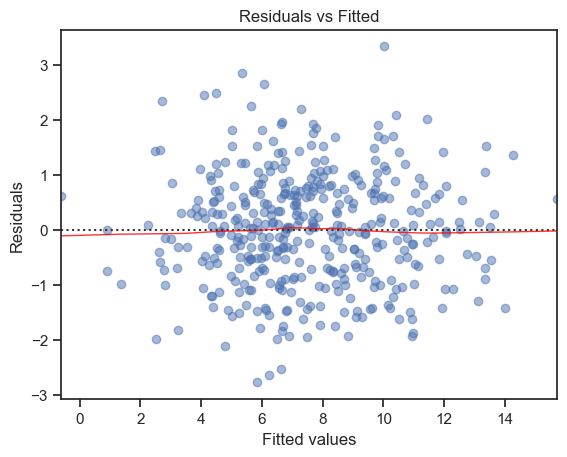

In [104]:
#Homoskedastistas

# fitted values
model_fitted_y = results5.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Sales', data=data_reg, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

#karena titik berada disekitar garis 0 dan tersebar secara random, maka dikatakan asumsi homoskedastisitas terpenuhi

In [105]:
#No multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].values, i)
                          for i in range(len(data_reg[["CompPrice","Income","Advertising","Price","Age","ShelveLoc_Good","ShelveLoc_Medium"]].columns))]
  
print(vif_data)

'''
Dapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi
'''

            feature        VIF
0         CompPrice  53.049570
1            Income   6.390116
2       Advertising   2.004628
3             Price  38.288755
4               Age   9.982259
5    ShelveLoc_Good   1.878286
6  ShelveLoc_Medium   3.243449


'\nDapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi\n'

In [106]:
#No Autokorelasi
sm.stats.durbin_watson(results5.resid)


1.988165390700889

In [107]:
'''
Dapat disimpulkan bahwa asumsi No Autokorelasi terpenuhi. 
'''


'\nDapat disimpulkan bahwa asumsi No Autokorelasi terpenuhi. \n'